This notebook is adapted from https://colab.research.google.com/github/mlittmancs/great_courses_ml/blob/master/L09aux.ipynb courtesy of [Mohannad Elhamod](https://wordpress.cs.vt.edu/elhamod/).

This notebook classifies diabetes using a decision tree.  We will see how the number of leaves and size of training data affect the performance of the model.

Below we import our libraries.

In [ ]:
import random
from sklearn import tree
import matplotlib.pyplot as plt
import math
import pandas as pd

Next, we download the data from GitHub. 
We display the data

In [ ]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

df = pd.read_csv("diabetes.csv")
df

--2022-09-06 18:06:46--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2022-09-06 18:06:46 (10.0 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


After downloading, we read the data and begin to process the data.

In [ ]:
# extract alllabs and alldat

with open("diabetes.csv", "r") as f:
    data = f.readlines()

feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")
feats = feats[0:(len(feats)-1)]	
alldat = []				
alllabs = []			
for i in range(1,len(data)):	
     line = data[i]		
     line = line.replace('\n','')		
     csvline = line.split(",")		
     alllabs = alllabs + [int(csvline[len(csvline)-1])]
     csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
     alldat = alldat + [csvline]

We next create a `trainmask` to separate training from testing data.  Using this `trainmask` we create the training and test datasets. 

In [ ]:
# 2/3 of data for training and 1/3 for testing

trainmask = [random.randint(0,2) for i in range(len(alldat))]

traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]]
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]]
testdat = [alldat[i] for i in range(len(alldat)) if not trainmask[i]]
testlabs = [alllabs[i] for i in range(len(alldat)) if not trainmask[i]]

Next we will train 28 decision trees with 2 to 29 `max_leaf_nodes` and record the train and test error.

In [ ]:
testerr = []
trainerr = []
nleaves = range(2,30)

for n in nleaves:
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = n)	
  clf = clf.fit(traindat, trainlabs)
  
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]


We plot the train and test error by number of leaves below.

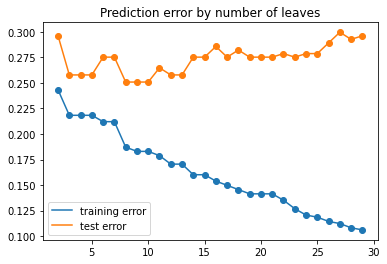

In [ ]:
plt.scatter(nleaves, trainerr)
plt.plot(nleaves, trainerr, label='training error')
plt.scatter(nleaves, testerr)
plt.plot(nleaves, testerr, label='test error')
plt.legend()
plt.title('Prediction error by number of leaves')
plt.show()

Now we will see how the performance of the model is affected by the size of the training data.  We will:
- create an additional mask `minimask` and use it to create a new set of training data
- train a decision tree classifier with 5 leaf nodes
- calculate the error rate on the train and test set of the model given the size of the training data

In [ ]:
testerr = []
minierr = []
ms = [math.ceil(len(traindat) * (i+1)/10) for i in range(10)]
# actualms = []
repeats = 20

for m in ms:
  minitotal = 0
  testtotal = 0
  for r in range(repeats):
    minimask = [random.randint(0,len(traindat)-1) <= m for i in range(len(traindat))]
    minidat = [traindat[i] for i in range(len(traindat)) if minimask[i]]
    minilabs = [trainlabs[i] for i in range(len(traindat)) if minimask[i]]
    clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5)	
    clf = clf.fit(minidat, minilabs)
    pred = clf.predict(minidat)
    minitotal += sum([pred[i] != minilabs[i] for i in range(len(minilabs))]) / len(minilabs)
    pred = clf.predict(testdat)
    testtotal += sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)
  minierr += [minitotal / repeats]
  testerr += [testtotal / repeats]

Finally, we plot the error rate of the training data and the test data in relation to the size of the training data.

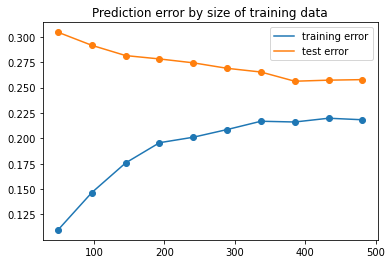

In [ ]:
plt.scatter(ms, minierr)
plt.plot(ms, minierr, label = 'training error')
plt.scatter(ms, testerr)
plt.plot(ms, testerr, label = 'test error')
plt.legend()
plt.title('Prediction error by size of training data')
plt.show()

Now, let's add some features with random values and see how they affect the model

  0%|          | 0/3000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
100%|██████████| 40/40 [00:03<00:00, 12.58it/s]


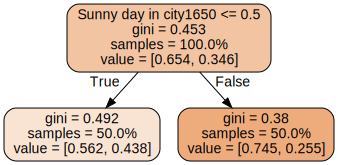

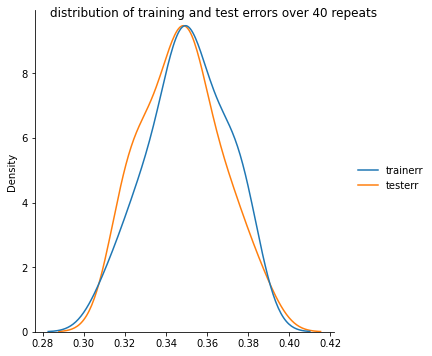

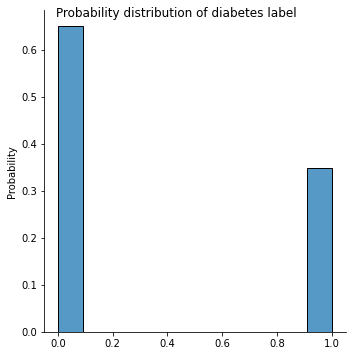

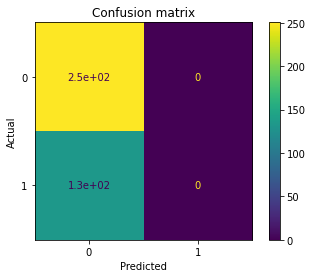

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

num_of_random_variables = 3000
repeats = 40
max_leaf_nodes = 2

df_attributes = df.iloc[:, :-1]
df_labels = df.iloc[:, [-1]]
for i in tqdm(range(num_of_random_variables)):
  df_attributes['Sunny day in city' + str(i)] = np.random.randint(0, 2, len(df.index))

# remove relevant features  
df_attributes = df_attributes.iloc[:, 8:]

all_dat = df_attributes.to_numpy()
all_labs = df_labels.to_numpy()

# Let's repeat the experiment
df_errs = []
cm = []
for i in tqdm(range(repeats)):
  dat, test_dat, labs, test_labs = train_test_split(all_dat,
                                                    all_labs, test_size=0.5)

  clf = tree.DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes)	
  clf = clf.fit(dat, labs)

  pred = clf.predict(dat)
  trainerr = sum([pred[i] != labs[i] for i in range(len(labs))]) / len(labs)
  pred = clf.predict(test_dat)
  
  testerr = sum([pred[i] != test_labs[i] for i in range(len(test_labs))]) / len(test_labs)

  df_errs.append(
      {
          'trainerr': trainerr[0],
          'testerr': testerr[0],
      }
  )
  cm.append(confusion_matrix(test_labs,pred))

cm = sum(cm)/repeats

df_errs = pd.DataFrame(df_errs)

plot = sns.displot(df_errs, kind="kde")
plot.fig.suptitle('distribution of training and test errors over ' + str(repeats) + ' repeats')

plot = sns.displot(all_labs.reshape(-1),stat="probability")
plot.fig.suptitle('Probability distribution of diabetes label' )


cmd_obj = ConfusionMatrixDisplay(cm)
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion matrix', xlabel='Predicted', ylabel='Actual')


import graphviz 

dot_data = tree.export_graphviz(clf, feature_names=df_attributes.columns,
                      filled=True, rounded=True, proportion=True) 
graph = graphviz.Source(dot_data)	
graph	

Let's plot over trees of different sizes

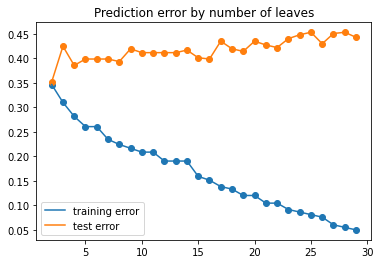

In [ ]:
testerr = []
trainerr = []
nleaves = range(2,30)

for n in nleaves:
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = n)	
  clf = clf.fit(dat, labs)
  
  pred = clf.predict(dat)
  trainerr += [sum([pred[i] != labs[i] for i in range(len(labs))]) / len(labs)]
  pred = clf.predict(test_dat)
  testerr += [sum([pred[i] != test_labs[i] for i in range(len(test_labs))]) / len(test_labs)]

plt.scatter(nleaves, trainerr)
plt.plot(nleaves, trainerr, label='training error')
plt.scatter(nleaves, testerr)
plt.plot(nleaves, testerr, label='test error')
plt.legend()
plt.title('Prediction error by number of leaves')
plt.show()

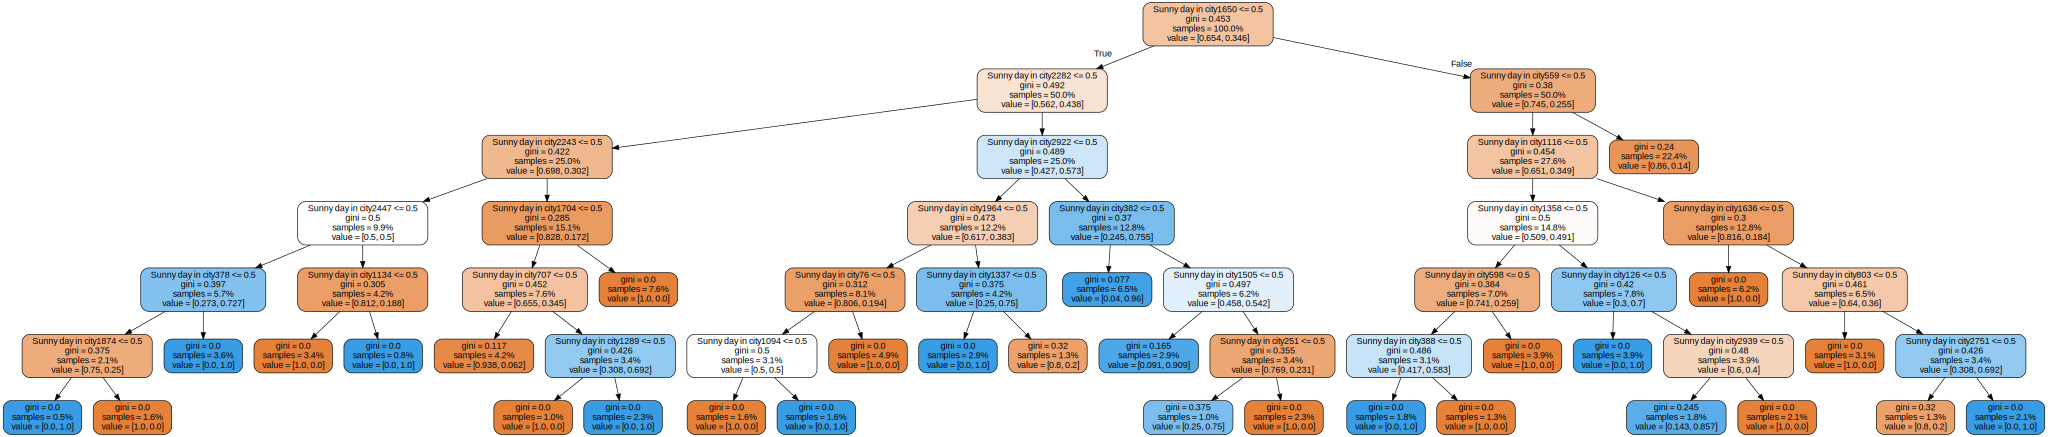

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf, feature_names=df_attributes.columns,
                      filled=True, rounded=True, proportion=True) 
graph = graphviz.Source(dot_data)	
graph	